# CIS600 - Social Media & Data Mining
###  
<img src="https://www.syracuse.edu/wp-content/themes/g6-carbon/img/syracuse-university-seal.svg?ver=6.3.9" style="width: 200px;"/>

# Classification with Machine Learning

###  February 27, 2018

## Assignment 2
- Deadline is hereby moved to Friday after the midterm (3/9) - focus on studying!
- Do not submit your credentials; instead include a pickled networkx object, or a CSV file, zipped with your notebook.
    - Your notebook must have code for loading the object(s) required for displaying the end product.
- If you are successful with a *smaller* "seed user" (e.g. < 10000 followers), then that is fine. Go with that.
- You must follow the breadth-first paradigm, but are not strictly required to start from the functions developed in class.
- Now, let's troubleshoot one detail together...

## General Idea

<img src="notebook-images/classification-paradigm.png" style="width: 600px;"/>

(The red arrow points to the part where we build the classifier.)

### Note that we have departed from "data mining" proper because we are using labelled data. Data mining typically is thought of as *exploratory*, but now we are *modeling* the data.

### Last week, we discussed *sentiment analysis*, which is a subset of *natural language processing*. We saw some fundamental tools of NLP. Sentiment analysis is also a type of *classification*. Today we are going to look at some basic concepts and tools of classification. Next, we will tie it all together.

## Supervised Learning

### In classification, we are trying to obtain a function for classifying things. Those things could be images, sentences, user profiles, etc. This comes very naturally to us, but is hard to code.

<img src="notebook-images/digits.gif" style="width: 400px;"/>

### (Think about writing a function manually to determine which digit is represented in handwriting)

### This is where the "learning" comes in. Instead of writing a function manually, we start with a very general function that has knobs on it. Then we tune those knobs by running many labelled data points through the function in an automated way. Note that these knobs are not literal, nor even a great metaphor since, as we will see, there are non-parametric learning algorithms.

<img src="notebook-images/function-knobs.png" style="width: 600px;"/>

### More generally, when we have data with features and *target* or *dependent* variable(s), we want to *learn* a function from the given data so that we can apply it to other data. To predict unknown values, continuous in the case of *regression* and discrete in the case of *classification*. A very basic example of this, which is actually a case of *regression*, is that of curve fitting as in calculus class.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Curve_fitting.svg/512px-Curve_fitting.svg.png" style="width: 600px;"/>

### In the example above, the black dots are data, and the lines are first, second, third and fourth degree polynomial approximations. What are the knobs here and now are they tuned? In this case, the general function is of this form:

# $f_{\color{blue}{a}}(x) = \color{blue}{a_0} + \color{blue}{a_1}x + \color{blue}{a_2}x^2 + \color{blue}{a_3}x^3 + \color{blue}{a_4}x^4$

### The $\color{blue}{knobs}$ are the coefficients of the polynomial, and the tuning can be done in very many different ways. Generally, there is an *objective* or *cost* function to be minimized. In this case, it could be something like the total sum of the absolute errors:

# $E(f_{\color{blue}{a}}) = \sum_i \big|f_{\color{blue}{a}}(x_i) - y_i\big| $

### (The sum would be taken over all the data points, or at least all those in the *training set*.)

### Having found some reasonable parameters, you could then evaluate $f_{\color{blue}{a}}(x)$ for values of $x$ not included in the original data (an produce a good estimate).

### Rmk: We want to find values for the parameters, or tunings of the knobs, so that error is minimized. But not every supervised learning method fits this model - to wit, $k$-nearest neighbors. 

### Furthermore, finding strictly the best fit to the training data does not give a useful function that works well on other data outside the training set.

## Binary Classification

### We will focus on binary classification today. Let's assume our *training set* consists of vectors $x_i \in \mathbb{R}^n$ with associated labels $y_i \in \{1,-1\}$, for $ 1 \leq i \leq m$. 

## SVM - Support Vector Machine

### The SVM finds a *separating hyperplane*. The image below depicts this as a line.

## Separating Hyperplanes

<img src="notebook-images/Separating.png" style="width: 600px;"/>

### We want the hyperplane that gives the widest possible margin between the two classes. If the dataset is linearly separable, here's how that works: 

### We want to compute two parallel hyperplanes:
## $ H_0 = \{ x \mid \color{blue}{w} \cdot x + \color{blue}{b} \geq 1 \} $
## $ H_1 = \{ x \mid \color{blue}{w} \cdot x + \color{blue}{b} \leq -1 \} $

### and we want them to be as far apart as possible subject to the constraint that all training examples lie in their union ($H_0 \cup H_1$). This amounts to *minimizing* the norm $\|w\|$.

### The *decision function* that actually gives our classifier is then given by, for example

## $f_{\color{blue}{w}}(x) = sign(\color{blue}{w} \cdot x + b)$

### What if we can't separate the points? Or don't want to? We can introduce *slack variables* and use regularization to relax the strict separation condition (SVC does this). We can also map into a higher dimensional space where our dataset's image *is* strictly separable!

In [33]:
# For random points
import numpy as np

# Plotting using Bokeh
from bokeh.plotting import figure, show, output_notebook

# Show in notebook.
output_notebook()

# Build a figure
p = figure(title="Bokeh Markers", toolbar_location=None)
p.grid.grid_line_color = None
p.background_fill_color = "#eeeeee"

def mscatter(p, x, y, marker, fill):
    p.scatter(x, y, marker=marker, size=15,
              line_color="navy", fill_color=fill, alpha=0.5)

# Number of datapoints
N = 100

# First cluster
X1 = np.linspace(-2,2,100)
Y1 = (2*X1**2 - 2) + np.random.random(100)

# Second Cluster
X2 = np.random.random(100) - 1/2
Y2 = np.random.random(100) + 1
    
# Throw in clusters
mscatter(p, X1, Y1, "circle", "blue")
mscatter(p, X2, Y2, "square", "orange")

# A line separating them
X = np.linspace(-2,2,100)
Y = 2*X**2
p.line(X,Y, line_color='red')


Loading BokehJS ...

GlyphRenderer(id='e4b96d9b-976c-4cda-81c5-da59570b2824', ...)

In [34]:
show(p)

### The $\color{red}{line}$ is a parabola. We can 'straighten' it out using the mapping $(x,y) \mapsto (x,x^2, y)$.

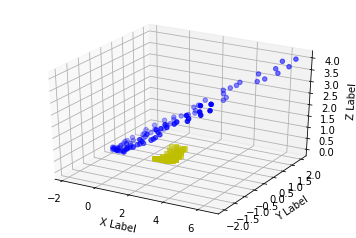

In [35]:
# Import numpy tools for 3d plotting
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# mplot's own scatter plot function
ax.scatter(Y1,X1,X1**2,c='b',marker='o')
ax.scatter(Y2, X2, X2**2,c='y',marker='s')

# Left this here in case you want to play
# with labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()

### This was just to illustrate what's going on. In general, you will certainly not be plotting the data in a higher-dimensional space, nor even mapping it.

### Instead of using the mapping $(x,y) \mapsto (x, x^2, y)$ and then taking dot products $(x,y,z) \cdot (w_1, w_2, w_3)$, we can use a *kernel function* $K({\bf x}, {\bf y})$ that measures *similarity* of two datapoints ${\bf x}, {\bf y}$ directly.

## The Kernel Trick

### The final form of the *decision function* in general is

## $f_w = sign \sum y_i w_i K\big(x_i, x\big)$

### Examples of kernel functions:
- polynomial kernel
##  $K(x_i,x_j) = (x_i \cdot x_j + 1)^h$
- Gaussian radial basis kernel
## $K(x_i,x_j) = \exp(\frac{-(x_i \cdot x_j)^2}{2\sigma^2})$

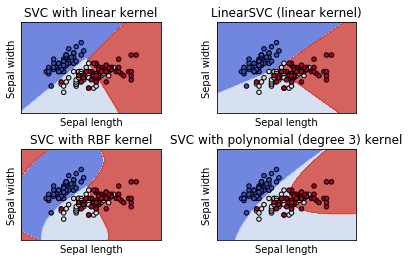

In [36]:
# Example taken from Sklearn docs.

from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# Import some data.
iris = datasets.load_iris()

# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### We will want to compare classifiers numerically, since we can't always plot them and 'see' how they are doing. We will also want to turn the other knobs, called *hyperparameters*, not tuned by the learning algorithm. See [this page](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_scale_c.html) for discussion of the effects of such hyperparameters in SVC performance.

## Naïve Bayes Classifier

### Bayes' Theorem is a simple mathematical statement regarding *conditional* and *joint probabilities.

## $ P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)} $

### We should probably say something about conditional probability.

<img src="notebook-images/Conditional_probability.png" style="width: 600px;"/>

### In a *naïve Bayes classifier*, the *events* or *conditions* are the observation of the data and the hypothesis that the data belong to a particular class. For that reason, you will often see Bayes' Theorem written like this:

## $ P(H \mid {\bf X}) = \frac{P({\bf X } \mid H) P(H)}{P({\bf X})}$

### where $H$ is the hypothesis that the data $\bf X$ belong to a given class.

### The term on the left is calling the *posterior* probability, estimate or distribution, depening on context.

### In terms of formulas, the naïve model assumes *independence* of the probabilities of the various attributes or features of the data.

## $ P({\bf X} \mid C_i) = \prod_{k=1}^n P(x_k \mid C_i)$

### (This is a *totally unreasonable assumption*, but very often doesn't cost much at the level of classifier results. Why?)

### Example

<img src="notebook-images/bayes.png" style="width: 600px;"/>

### This is the dataset, $X$. Each row is an observation. Note that in this case, the data is categorical. More advanced methods are needed to update continuous variables, but here we use simple proportions.

### Goal: to classify the datapoint $X=$ (age $\leq 30$, income $= $medium, student $= $yes, credit_rating $= $ fair).

### We are able to calculate directly from aggregate stats the values of $P(x \mid C_i)$ for any given feature $x$ and category $C_i$. Here, we want two classes:

## $C_1: \text{buys_computer="yes"}$
## $C_2: \text{buys_computer="no"}$

### We want to find out which is larger, $P(C_1 \mid X)$ or $(P(C_2 \mid X)$.

In [41]:
# Let's store probabilities in dictionaries.
PXC1, PXC2 = dict(), dict()
PXC1['age <= 30'], PXC2['age <= 30'] = 2/9, 3/5
PXC1['income = medium'], PXC2['income = medium'] = 4/9, 2/5
PXC1['student = yes'], PXC2['student = yes'] = 6/9, 1/5
PXC1['credit_rating = fair'], PXC2['credit_rating = fair'] = 6/9, 2/5

In [42]:
# Calculating the first posterior
prod = 1
for key in PXC1:
    prod *= PXC1[key]

### The joint probability of $X$ (our data) and category $1$ is...

In [44]:
prod * (9/14)

0.028218694885361547

### For the second category...

In [45]:
# Calculating the first posterior
prod = 1
for key in PXC2:
    prod *= PXC2[key]

In [46]:
prod * (5/14)

0.006857142857142858

### Therefore, our $X$ gets classified into $C_1$, "buys computer".

## Non-parametric Algorithms

## Decision Tree

<img src="notebook-images/dm_decision_tree.jpg" style="width: 600px;"/>

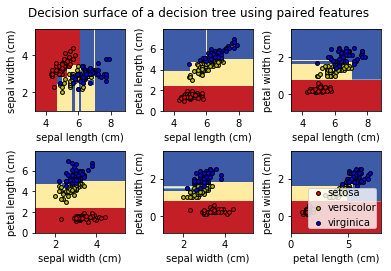

In [50]:
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

## $k$-Nearest Neighbor 

<img src="notebook-images/k-nearest.png" style="width: 400px;"/>

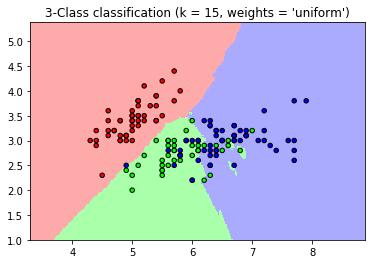

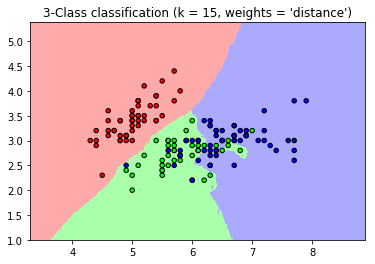

In [49]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors

n_neighbors = 15


X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

## Evaluation (next)

### Accuracy: overall rate of correct classification. This is mostly useless most of the time.

### Precision & Recall

<img src="notebook-images/Precisionrecall.png" style="width: 600px;"/>

### Precision-Recall Curve

### ROC: Receiver Operating Characteristic